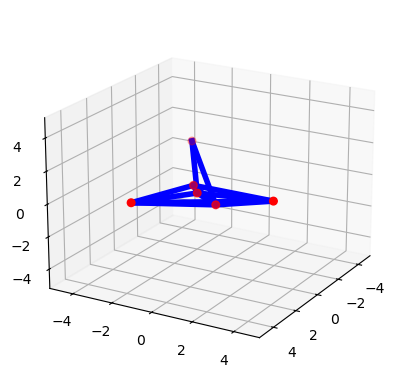

In [1]:
# Define the vertices
vertices = [
    vector([30/10, -40/17, -5/36]),  # p1
    vector([0, -1, 0]),            # p2
    vector([1/3, 15/46, -3/4]),    # p3
    vector([8/17, -9/17, -1/6]),   # p4
    vector([0, 3, 0]),             # p5
    vector([-18/10, -32/15, 34/19])     # p6
]

edges = [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,4),(2,3),(3,4),(5,2),(5,3)]


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_graph(vertices, edges):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extracting x, y, z coordinates from vertices
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]

    # Plot vertices
    ax.scatter(x, y, z, color='red', s=30)  

    # Plot edges
    for edge in edges:
        ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                [vertices[edge[0]][1], vertices[edge[1]][1]],
                [vertices[edge[0]][2], vertices[edge[1]][2]], color='blue', linewidth=4)

    # Set axes limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])

    # Set fixed viewpoint
    ax.view_init(elev=20, azim=30)  # Change angles as needed

    return plt

# Call the function with your vertices and edges
plt = plot_graph(vertices, edges)









In [2]:
R=Matrix(QQ, 12, 18)
# Define the vertices
vertices = [(3/10, -2/17, -5/36), (0, -1, 0), (1/3, 15/46, -3/4), (817/1700, -871231/1578450, -18763/92850), (323568396214/1422910182271, 3, 1564/15475), (-1316666/1470125, -302329/705660, 7504999/8820750)]

# List of edges 
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5),
         (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]



def buildMatrix(vertices, edges, R):
    for k, (i, j) in enumerate(edges):
        for dim in range(3):
            R[k, 3*i + dim] = vertices[j][dim] - vertices[i][dim]
            R[k, 3*j + dim] = -vertices[j][dim] + vertices[i][dim]
    cols_to_remove = [0, 1, 2, 4, 5, 8]
    # Remove these columns from the rigidity matrix
    R = R.delete_columns(cols_to_remove)   
    return R

R = buildMatrix(vertices, edges, R)
print(R.rank())

11


In [3]:
R = Matrix(QQ, 12, 18)  # QQ ensures all matrix operations are in the field of rational numbers

vertices = [
    vector([30/10, -40/17, -5/36]),  # p1
    vector([0, -1, 0]),            # p2
    vector([1/3, 15/46, -3/4]),    # p3
    vector([8/17, -9/17, -1/6]),   # p4
    vector([0, 3, 0]),             # p5
    vector([-18/10, -32/15, 34/19])     # p6
]

edges = [(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(2,4),(2,3),(3,4),(5,2),(5,3)]

# Function to compute the kernel
def get_kernel(vertices, edges, R):
    for k, (i, j) in enumerate(edges):
        for dim in range(3):
            R[k, 3*i + dim] = vertices[j][dim] - vertices[i][dim]
            R[k, 3*j + dim] = -vertices[j][dim] + vertices[i][dim]
    cols_to_remove = [0, 1, 2, 4, 5, 8]
    # Remove these columns from the rigidity matrix
    R = R.delete_columns(cols_to_remove) 
    kernel = R.right_kernel().basis()[0]  # This will be in rational numbers
    return  0.5*kernel
kernel = get_kernel(vertices, edges, R)

# Function to increment vertices with the kernel
def increment(vertices, kernel_vector):
    # Create a long vector from vertices
    long_vector = [coord for vertex in vertices for coord in vertex]
    
    # Indices to remove
    remove_indices = [0, 1, 2, 4, 5, 8]
    
    # Store the original values at the specified indices
    original_values = [long_vector[idx] for idx in remove_indices]
    
    # Remove entries at specified indices
    remaining_vector = [val for idx, val in enumerate(long_vector) if idx not in remove_indices]
    
    # Add the kernel vector to the remaining entries
    for i in range(len(kernel_vector)):
        if i < len(remaining_vector):
            remaining_vector[i] += kernel_vector[i]
    
    # Create an 18-entry vector
    final_vector = [0] * 18  # Initialize a list of 18 zeros
    for idx, val in zip(remove_indices, original_values):
        final_vector[idx] = val  # Put back the original values at their indices
    
    remaining_index = 0
    for i in range(18):
        if i not in remove_indices:
            final_vector[i] = remaining_vector[remaining_index]
            remaining_index += 1
    
    # Now put the final vectors back into vertices
    new_vertices = []
    index = 0
    for i in range(6):  
        new_vertex = vector([QQ(final_vector[index]), QQ(final_vector[index + 1]), QQ(final_vector[index + 2])])  # Ensure QQ type
        new_vertices.append(new_vertex)
        index += 3
    
    return new_vertices

# Increment the vertices
vertices = increment(vertices, kernel)
print(kernel)
print(vertices)


(0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.500000000000000, 1.07948065926537, 1.46548606733328)
[(3, -40/17, -5/36), (0, -1, 0), (1/3, 15/46, -3/4), (8/17, -9/17, -1/6), (0, 3, 0), (-13/10, -31194271/29600220, 61020099/18746806)]


In [4]:
kernel = get_kernel(vertices, edges, R)
vertices = increment(vertices, kernel)
print(kernel)
print(vertices)
def plot_graph(vertices, edges):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extracting x, y, z coordinates from vertices
    x = [v[0] for v in vertices]
    y = [v[1] for v in vertices]
    z = [v[2] for v in vertices]

    # Plot vertices
    ax.scatter(x, y, z, color='red', s=30)  # s is the size of points

    # Plot edges
    for edge in edges:
        ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
                [vertices[edge[0]][1], vertices[edge[1]][1]],
                [vertices[edge[0]][2], vertices[edge[1]][2]], color='blue', linewidth=4)

    # Set axes limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])

    # Set fixed viewpoint
    ax.view_init(elev=20, azim=30)  # Change angles as needed

    return plt


(0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.500000000000000, 0.286593201711801, 0.302661714165571)
[(3, -40/17, -5/36), (0, -1, 0), (1/3, 15/46, -3/4), (8/17, -9/17, -1/6), (0, 3, 0), (-4/5, -55170621/71906080, 301327226/84699069)]


In [5]:
def project_kernel(new_kernel, old_kernel):
    """Project new_kernel onto old_kernel using basic Python operations."""
    # Calculate the dot product of new_kernel and old_kernel
    dot_product = sum(nk * ok for nk, ok in zip(new_kernel, old_kernel))
    
    # Calculate the norm squared of old_kernel
    old_norm_squared = sum(ok * ok for ok in old_kernel)
    
    # Calculate the projection scalar and project the new_kernel onto old_kernel
    projection = [(dot_product / old_norm_squared) * ok for ok in old_kernel]
    
    return projection


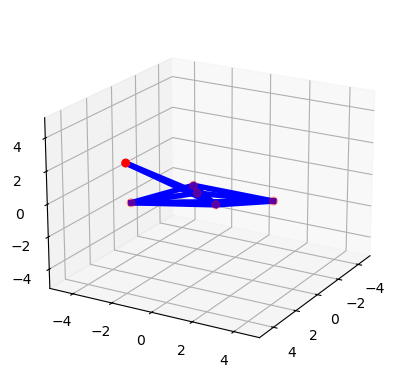

In [6]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Number of frames for the animation
num_frames = 100

# Get initial kernel
old_kernel = get_kernel(vertices, edges, R)

# Generate plots for each frame
for i in range(num_frames):
    # Clear the previous output
    clear_output(wait=True)

    # Create a plot for the current vertices and edges
    fig = plot_graph(vertices, edges)  # Create and return the plot

    # Show the plot
    plt.show()

    # Pause to display the frame
    time.sleep(float(0.05))  # Adjust the sleep duration for the desired delay

    # Calculate the new kernel
    new_kernel = get_kernel(vertices, edges, R)

    # Project the new kernel onto the old kernel
    projected_kernel = project_kernel(new_kernel, old_kernel)

    # Update vertices using the projected kernel
    vertices = increment(vertices, projected_kernel)

# Turn off interactive mode when done
plt.ioff()
